In [6]:
import pandas as pd
import sklearn
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
import matplotlib.pyplot as plt
import lime.lime_tabular

In [7]:
df = pd.read_csv('/home/tteofili/Downloads/SBAnational.csv')
df.head()

/home/tteofili/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,...,N,Y,NaN,28-Feb-99,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00"
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,...,N,Y,NaN,31-May-97,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00"
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,...,N,N,NaN,31-Dec-97,"$287,000.00",$0.00,P I F,$0.00,"$287,000.00","$215,250.00"
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997,...,N,Y,NaN,30-Jun-97,"$35,000.00",$0.00,P I F,$0.00,"$35,000.00","$28,000.00"
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,28-Feb-97,1997,...,N,N,NaN,14-May-97,"$229,000.00",$0.00,P I F,$0.00,"$229,000.00","$229,000.00"


In [8]:
bad_columns = ['LoanNr_ChkDgt', 'NAICS', 'ApprovalDate', 'DisbursementDate', 'Name', 'FranchiseCode']
target = 'MIS_Status'
categorical = ['City', 'State', 'Zip', 'Bank', 'BankState', 'NewExist', 'UrbanRural', 'RevLineCr', 'LowDoc']
ordinal = ['ApprovalFY', 'Term', 'NoEmp', 'CreateJob', 'RetainedJob']
money_columns = ['DisbursementGross', 'BalanceGross', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv']
date_col = ['ChgOffDate']

In [9]:
# drop bad columns
df = df.dropna()
df = df.drop(columns=bad_columns)

In [10]:
# convert date to ordinal days
import datetime as dt
for c in date_col:
    df[c] = pd.to_datetime(df[c]).map(dt.datetime.toordinal)

In [11]:
# encode labels
le = sklearn.preprocessing.LabelEncoder()
df[target] = le.fit_transform(df[target].astype(str))
class_names = le.classes_
print(class_names)

['CHGOFF' 'P I F']


In [12]:
# process ordinal features
for col in ordinal:
    df[col] = pd.to_numeric(df['ApprovalFY'].replace('1976A','1976', regex=False).replace('\d+\-\w+\-\d+|,','', regex=True))
    df[col] = df[col].astype('int32')

In [13]:
# process money columns
for c in money_columns:
    df[c] = df[c].replace('\$|,','', regex=True).replace('\(','-', regex=True).replace('\)','', regex=True)
    df[c] = pd.to_numeric(df[c])

In [14]:
# process categorical features
cat_idxs = [df.columns.get_loc(c) for c in categorical if c in df]
print(cat_idxs)
categorical_names = {}
for c in categorical:
    le = preprocessing.LabelEncoder()
    df[c] = le.fit_transform(df[c])
    categorical_names[c] = le.classes_

[0, 1, 2, 3, 4, 8, 11, 12, 13]


In [15]:
Y = df[target]
X = df.drop(columns=[target])

# Split the data into train and test data:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [16]:
df.head()

,City,State,Zip,Bank,BankState,ApprovalFY,Term,NoEmp,NewExist,CreateJob,...,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
6,13801,31,1398,3393,43,1980,1980,1980,2,1980,...,0,2,3,727007,600000.0,0.0,0,208959.0,600000.0,499998.0
36,6727,35,8859,930,36,1997,1997,1997,1,1997,...,0,2,6,730958,47000.0,0.0,0,14084.0,47000.0,37600.0
43,3773,15,9249,1987,16,1980,1980,1980,2,1980,...,0,5,3,726379,197485.0,0.0,0,44374.0,200000.0,150000.0
58,2311,21,933,3393,43,2006,2006,2006,1,2006,...,1,0,3,735410,1350000.0,0.0,0,1043508.0,1350000.0,1012500.0
60,13187,22,10131,3393,43,1997,1997,1997,1,1997,...,0,0,3,732223,25000.0,0.0,0,23484.0,25000.0,12500.0


[1.72967214e-02 8.83504152e-03 4.63787542e-02 8.78192337e-02
 1.30122965e-02 1.57912966e-05 2.98990474e-04 5.65201923e-04
 3.39977481e-04 2.37976199e-03 5.22076904e-03 4.71282579e-03
 1.14879434e-02 2.96699488e-04 1.77125464e-01 3.71703488e-02
 0.00000000e+00 5.50815956e-01 1.50834392e-02 2.11447834e-02]


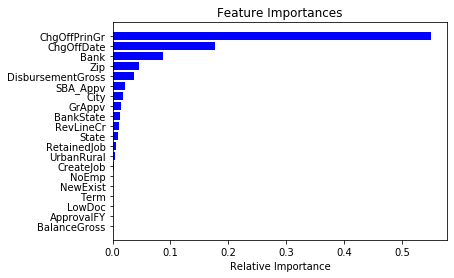

0.9686402486402487

In [40]:
dt = DecisionTreeClassifier(max_depth=8)
dt.fit(X_train, Y_train)  
print(dt.feature_importances_)
importances = dt.feature_importances_
indices = np.argsort(importances)
features = X_train.columns
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()
sklearn.metrics.accuracy_score(Y_test, dt.predict(X_test))

In [41]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
out = dt.predict(X_test) 

print(confusion_matrix(Y_test,out))
print(classification_report(Y_test,out))
print(accuracy_score(Y_test, out))


[[31154    46]
 [  963    12]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     31200
           1       0.21      0.01      0.02       975

    accuracy                           0.97     32175
   macro avg       0.59      0.51      0.50     32175
weighted avg       0.95      0.97      0.95     32175

0.9686402486402487


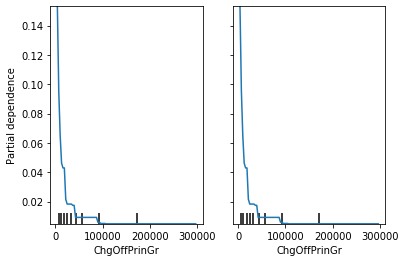

In [43]:
from sklearn.inspection import plot_partial_dependence
features = [17, (17)]
plot_partial_dependence(dt, X_train, features)

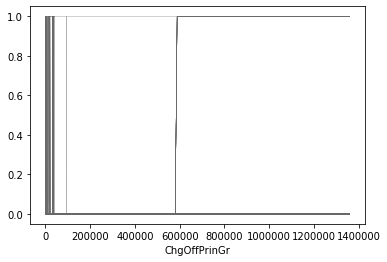

In [53]:
from pycebox.ice import ice, ice_plot
f = 'ChgOffPrinGr'
ice_df = ice(data=X_train[0:2000], column=f, 
                   predict=dt.predict)
ice_plot(ice_df, c='dimgray', linewidth=0.3)
plt.ylabel('')
plt.xlabel(f);

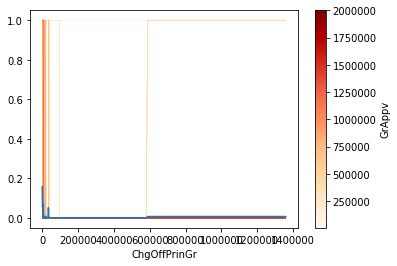

In [57]:
cmap2 = plt.get_cmap('OrRd')
cb = 'GrAppv'
ice_plot(ice_df, linewidth=0.5, color_by=cb, cmap=cmap2, plot_pdp=True)
cb_vals = ice_df.columns.get_level_values(cb).values
sm = plt.cm.ScalarMappable(cmap=cmap2, 
                           norm=plt.Normalize(vmin=cb_vals.min(), 
                                              vmax=cb_vals.max()))
sm._A = []
plt.colorbar(sm, label=cb)
plt.ylabel('')
plt.xlabel(f);